In [1]:
import pandas as pd
import random
import numpy as np
import os
import glob
import cv2

In [2]:
def resize(path, img_height, img_width):
    img = cv2.imread(path)
    resized = cv2.resize(img, (img_height, img_width))
    return resized

In [3]:
def get_data():
    train_dir = "./data/Training_data/"
    X = []
    y = []
    
    for j in range(10):
        print('Load folder c{}'.format(j))
        path = os.path.join(train_dir, 'c' + str(j), '*.jpg')
        files = glob.glob(path)
        for fl in files:
            flbase = os.path.basename(fl)
            img = resize(fl, 64, 64)
            X.append(img)
            y.append(j)
    return X,y

In [4]:
X, y = get_data()

Load folder c0
Load folder c1
Load folder c2
Load folder c3
Load folder c4
Load folder c5
Load folder c6
Load folder c7
Load folder c8
Load folder c9


In [19]:
#converted images into numpy array
X = np.asarray(X)
y = np.asarray(y)
print(X.shape)

(2200, 64, 64, 3)


In [20]:
#convert each image into a vector which represented as a row in the matrix X
X = np.reshape(X, (X.shape[0], -1))

In [21]:
print(X.shape)

(2200, 12288)


In [22]:
#converted vector into matrix 2200 * 1
y=y.reshape((-1,1))

In [23]:
print(y.shape)

(2200, 1)


In [24]:
#merge X and y matrix
X=np.hstack((X,y))

In [25]:
print(X.shape)

(2200, 12289)


In [26]:
#now shuffle the data points(each data point is a image)
np.random.shuffle(X)

In [27]:
pd.DataFrame(X).head(10)

,0,1,2,3,4,5,6,7,8,9,...,12279,12280,12281,12282,12283,12284,12285,12286,12287,12288
0,41,52,42,37,46,37,72,97,83,0,...,31,30,32,30,29,33,46,47,45,3
1,32,43,33,36,48,37,40,50,37,43,...,18,19,26,110,107,92,19,14,15,8
2,13,19,18,13,19,18,15,20,19,14,...,9,8,10,8,10,10,6,8,8,4
3,46,50,44,46,50,44,45,52,45,45,...,12,10,16,8,9,17,13,10,13,9
4,18,27,21,22,35,29,17,29,22,15,...,6,10,11,7,9,10,10,12,13,2
5,48,61,45,45,58,42,48,59,43,50,...,11,14,18,7,11,12,10,14,15,5
6,36,46,34,33,43,32,32,41,31,34,...,7,9,10,7,9,10,5,7,8,8
7,79,92,66,79,92,66,84,95,69,88,...,34,35,36,36,34,32,36,33,35,2
8,43,52,39,44,53,40,45,54,41,48,...,10,12,13,52,54,55,7,9,10,6
9,27,44,30,29,46,32,36,47,37,36,...,11,11,27,40,39,27,17,15,21,2


In [28]:
#split1=int(0.4*X.shape[0])

In [29]:
#print(split1)

In [30]:
#X=X[:split1,:]

In [31]:
split=int(0.8*X.shape[0])

In [32]:
X_train=X[:split,:-1]

In [33]:
print(X_train.shape)

(1760, 12288)


In [34]:
X_validate=X[split:,:-1]

In [35]:
print(X_validate.shape)

(440, 12288)


In [36]:
y_train=X[:split,-1]

In [37]:
print(y_train.shape)

(1760,)


In [38]:
y_validate=X[split:,-1]

In [39]:
print(y_validate.shape)

(440,)


In [40]:
print('Training data shape: ', X_train.shape,y_train.shape)
print('Validation data shape: ', X_validate.shape,y_validate.shape)

Training data shape:  (1760, 12288) (1760,)
Validation data shape:  (440, 12288) (440,)


In [41]:
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6,7,8,9,...,12278,12279,12280,12281,12282,12283,12284,12285,12286,12287
0,41,52,42,37,46,37,72,97,83,0,...,29,31,30,32,30,29,33,46,47,45
1,32,43,33,36,48,37,40,50,37,43,...,12,18,19,26,110,107,92,19,14,15
2,13,19,18,13,19,18,15,20,19,14,...,21,9,8,10,8,10,10,6,8,8
3,46,50,44,46,50,44,45,52,45,45,...,15,12,10,16,8,9,17,13,10,13
4,18,27,21,22,35,29,17,29,22,15,...,13,6,10,11,7,9,10,10,12,13


In [42]:
pd.DataFrame(y_train).head()

,0
0,3
1,8
2,4
3,9
4,2


In [29]:
def dist(x1,x2):
    return np.sqrt(sum((x1-x2)**2))

In [30]:
def KNN(X, Y, query,k=10):
    m = X.shape[0]
    vals = []
    for i in range(m):
        d = dist(query, X[i])
        vals.append((d, Y[i]))

    vals = sorted(vals)
    vals = vals[:k]
    vals = np.array(vals)
    vals = np.unique(vals[:, 1], return_counts=True)
    index = vals[1].argmax()
    predict = vals[0][index]
    return predict

In [31]:
#import matplotlib.pyplot as plt
#plt.scatter(X_train[:,0],X_train[:,1],X_train[:,2],c=y_train)
#plt.scatter(query_x[0],query_x[1],color='red')
#plt.show()
#print("Yellow points Represents the Class 1")
#print("Blue points Represents the Class 0")
#print("Red is the new data-point")
y_predict=[]
n=X_validate.shape[0]
for i in range(n):
    query_x=X_validate[i]
    e=int(KNN(X_train,y_train,query_x))
    y_predict.append(e)

In [32]:
pd.DataFrame(y_validate).head(20)

,0
0,2
1,9
2,1
3,8
4,7
5,6
6,7
7,8
8,0
9,3


In [33]:
y_predict=np.asarray(y_predict)

In [34]:
def Accuracy(actual,predict):
    acc=np.sum((actual==predict))/actual.shape[0]
    return acc*100
    

In [35]:
print("Accuracy with KNN=",Accuracy(y_validate,y_predict))

Accuracy with KNN= 74.77272727272727


In [36]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_validate,y_predict)

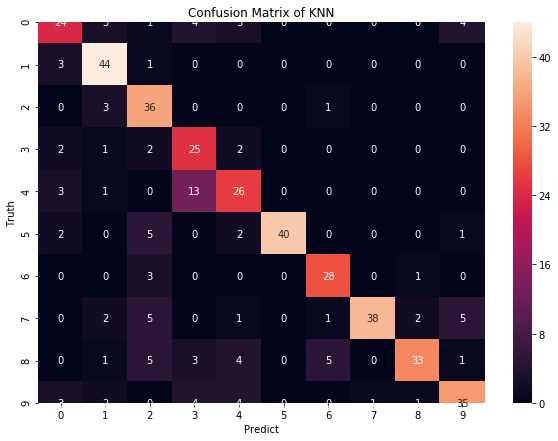

In [40]:
import seaborn as sn
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.title("Confusion Matrix of KNN")
sn.heatmap(cm,annot=True)
plt.xlabel("Predict")
plt.ylabel("Truth")
plt.show()

In [41]:
from sklearn import metrics
print("Performance Matrix of KNN")
print(metrics.classification_report(y_validate, y_predict))

Performance Matrix of KNN
              precision    recall  f1-score   support

           0       0.65      0.62      0.63        39
           1       0.77      0.92      0.84        48
           2       0.62      0.90      0.73        40
           3       0.51      0.78      0.62        32
           4       0.62      0.60      0.61        43
           5       1.00      0.80      0.89        50
           6       0.80      0.88      0.84        32
           7       0.97      0.70      0.82        54
           8       0.89      0.63      0.74        52
           9       0.76      0.70      0.73        50

    accuracy                           0.75       440
   macro avg       0.76      0.75      0.74       440
weighted avg       0.78      0.75      0.75       440

